# Bewegungsgleichung freies, gedämpftes Pendel:
$ \ddot\theta(t) + \frac{d}{m \cdot l^2} \cdot \dot\theta(t) + \frac{g}{l} \cdot \sin(\theta(t)) = 0 $

### Systemgleichungen:
$ \dot\theta(t) = \omega(t) $

$ \dot\omega(t) = - \frac{d}{m \cdot l^2} \cdot \omega(t) - \frac{g}{l} \cdot \sin(\theta(t)) $

### State Vector y:

$ y(t) = \begin{vmatrix}
\theta(t)\\
\omega(t)
\end{vmatrix}$

In [2]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html
# https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html

from ipywidgets import FloatSlider, interact_manual
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np


g = 9.81
m = 1.0

t1 = 25
frames = 500
t = np.linspace(0,t1,frames)


def pendulum(y, t, d, l):
    theta, omega = y
    return [omega, -d/(m*l**2)*omega - g/l*np.sin(theta)]

def plot_pendulum(t, sol, d, l, t0):
    %matplotlib inline
    fig, axs = plt.subplots(1, 1, figsize=(12,8), dpi=200)
    fig.suptitle('damped pendulum', fontsize=24)
    string = r"$d=%s\enspaceNm\cdot s;\enspacel=%s\enspacem;\enspace\theta_0=%s\enspacerad$"%(d,l,t0)
    axs.set_title(string, fontsize=18)
    axs.plot(t, sol[:, 0], 'b', label=r'$\theta(t)\enspace[rad]$')
    axs.plot(t, sol[:, 1], 'g', label=r'$\omega(t)\enspace([\frac{rad}{s}])$')
    axs.set_xlabel('time [s]', fontsize=20)
    axs.set_ylabel('amplitutde', fontsize=20)
    axs.legend(loc='best')
    axs.grid()
    plt.show()
    fig.savefig('pendulum.png')
    
    
damping = FloatSlider(value=0.42,min=0,max=1,step=0.01,description='$d$')
length = FloatSlider(value=1.0,min=0.5,max=3.0,step=0.5,description='$l$')
theta_0 = FloatSlider(value=3.14,min=0,max=np.pi,step=0.01,description=r'$\theta_0$')

def interaction(d, l, t0):
    
    # Anfangswerte
    y0 = [t0, 0.0] 
    
    # Integration
    sol = odeint(pendulum, y0, t, args=(d,l))
    
    # Visualisierung
    plot_pendulum(t, sol, d, l, t0)
    

interactive_plot = interact_manual(interaction, d=damping, l=length, t0=theta_0)

interactive(children=(FloatSlider(value=0.42, description='$d$', max=1.0, step=0.01), FloatSlider(value=1.0, d…

<IPython.core.display.Javascript object>


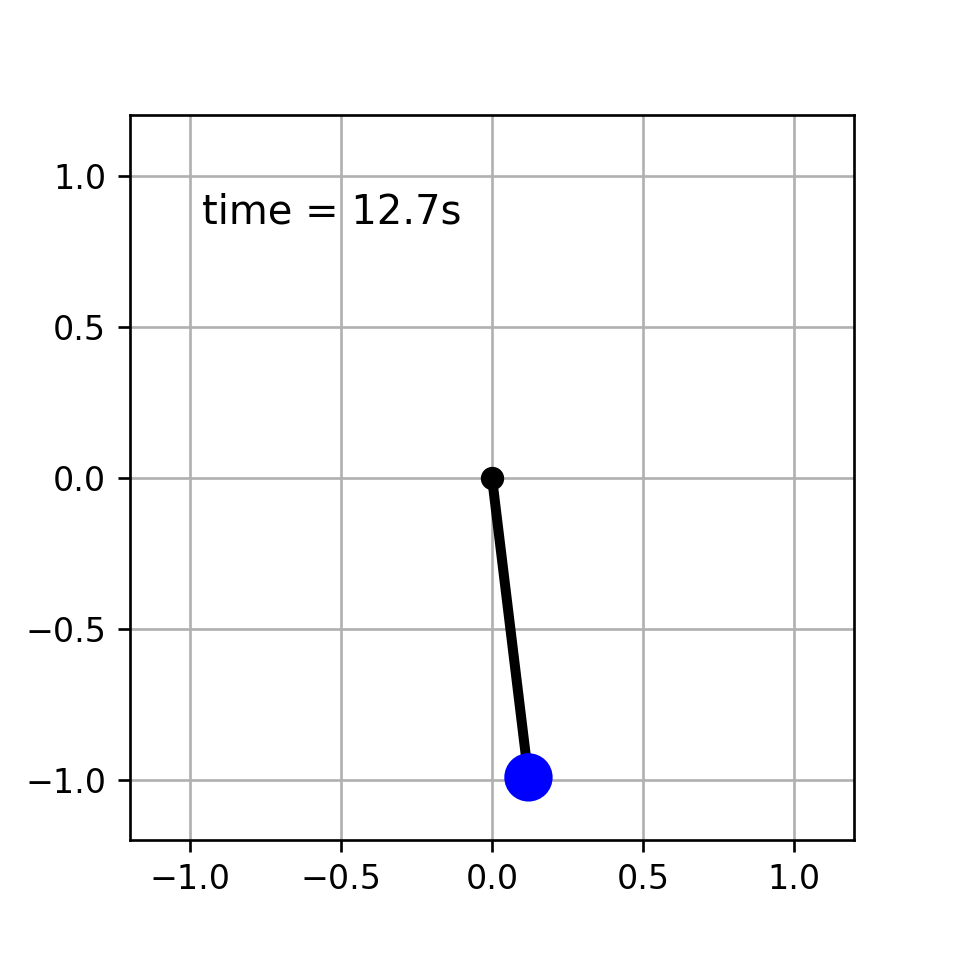

In [4]:
# https://github.com/zjor/inverted-pendulum/blob/master/python/free-pendulum.py

import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
%matplotlib notebook

l = length.value
solution = odeint(pendulum, [theta_0.value, 0.0], t, args=(damping.value, l))

x = l * np.sin(solution[:, 0])
y = - l * np.cos(solution[:, 0])


l *= 1.2 # Plot an Länge des Pendels anpassen

# Figure erstellen
fig = plt.figure(figsize=(4,4), dpi=120)
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-l, l), ylim=(-l, l))
ax.set_aspect('equal')
ax.grid()

# Pendelmasse
circle = plt.Circle((0,0), 0.08, fc='b', zorder=3)
circle = ax.add_patch(circle)

# Linie vom Ursprung zur Pendelmasse
line, = ax.plot([], [], 'o-', color='k',lw=3)

# Zeitlabel
time_template = 'time = %.1fs'
time_text = ax.text(0.1, 0.85, '', fontsize=12, transform=ax.transAxes)

# Animierter Plot
def animate(i):
    line.set_data([0, x[i]], [0, y[i]])  
    circle.set_center((x[i], y[i]))
    time_text.set_text(time_template % (t[i]))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, frames=len(t), interval=10, repeat=False, blit=True)
ani.save('pendulum.gif', writer='pillow', fps=frames/t1, dpi=200)